In [8]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from minisom import MiniSom
import matplotlib.pyplot as plt


```python
In this cell, we import the required libraries for our code. We'll use NumPy for numerical operations, scikit-learn for data preprocessing and clustering, and Matplotlib for visualization.
```

In [9]:
iris = load_iris()

# Split the dataset into features and labels
X = iris.data
y = iris.target

# Normalize the features
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)


```python
In this cell, we load the Iris dataset using scikit-learn's load_iris() function. We then split the dataset into features (X) and labels (y). Finally, we normalize the features using scikit-learn's MinMaxScaler class.
```

In [10]:
# Create a SOM model
som = MiniSom(x=10, y=10, input_len=4, sigma=1.0, learning_rate=0.5)

# Fit the SOM model on the data
som.random_weights_init(X)
som.train_random(data=X, num_iteration=10000)


```python
In this cell, we create a self-organizing map (SOM) model using the MiniSom class from the minisom library. We specify the dimensions of the SOM grid (x and y), the length of the input vectors (input_len), and the hyperparameters sigma and learning_rate. We then initialize the weights of the SOM randomly using the random_weights_init() method and train the SOM using the input data using the train_random() method.
```

In [11]:
# Get the closest neuron for each sample in the data
y_pred = np.array([som.winner(x) for x in X])


```python
In this cell, we use the winner() method of the SOM to assign each input sample to the closest neuron in the SOM grid. The winner() method returns the (x, y) coordinates of the closest neuron for a given input sample. We then convert the results to a NumPy array for convenience.
```

In [12]:
# Cluster the SOM neurons using KMeans
kmeans = MiniBatchKMeans(n_clusters=3, random_state=42)
kmeans.fit(y_pred)


MiniBatchKMeans(n_clusters=3, random_state=42)

```python
In this cell, we use KMeans clustering from scikit-learn to cluster the neurons of the SOM. We specify the number of clusters (n_clusters) as 3 and the random seed (random_state) as 42. We then fit the KMeans model on the SOM neuron assignments (y_pred) using the fit() method.
```

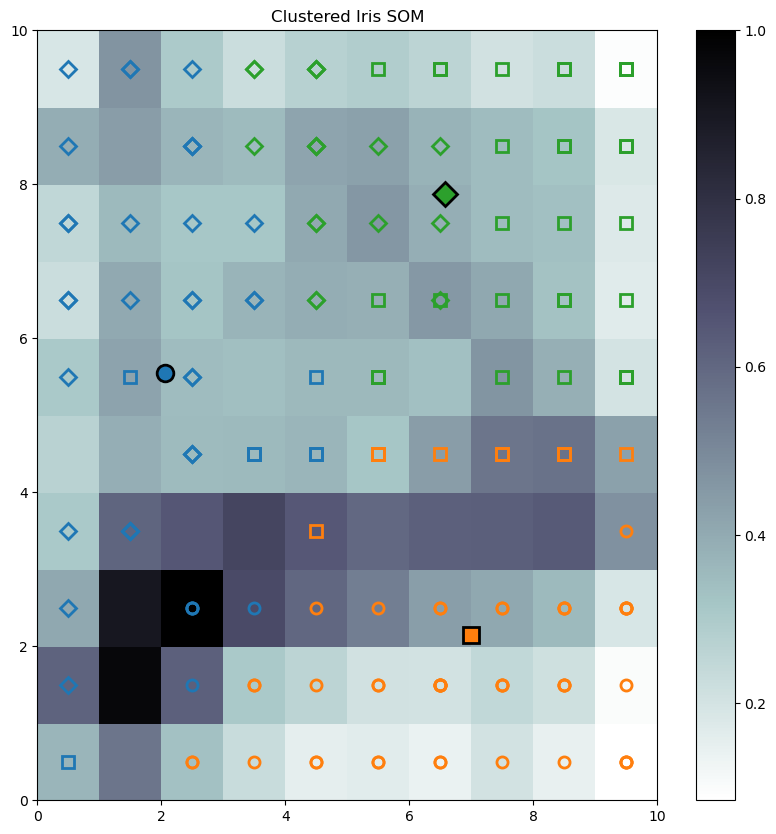

In [13]:
# Create a plot of the clustered SOM
plt.figure(figsize=(10, 10))
plt.pcolor(som.distance_map().T, cmap='bone_r')
plt.colorbar()

# Add markers for the samples and cluster centers
markers = ['o', 's', 'D']
colors = ['C0', 'C1', 'C2']
for i, x in enumerate(X):
    w = som.winner(x)
    plt.plot(w[0]+0.5, w[1]+0.5, markers[int(y[i])], markerfacecolor='None',
             markeredgecolor=colors[kmeans.labels_[i]], markersize=8, markeredgewidth=2)

# Add markers for the cluster centers
for i, center in enumerate(kmeans.cluster_centers_):
    plt.plot(center[0]+0.5, center[1]+0.5, markers[i], markerfacecolor=colors[i],
             markeredgecolor='k', markersize=12, markeredgewidth=2)

plt.title('Clustered Iris SOM')
plt.show()


```python
This code creates a plot of the clustered SOM for the iris dataset.

First, a figure of size 10x10 is created using the plt.figure() function. Then, the distance_map() method of the SOM object is used to generate a heatmap of the distance between each neuron in the SOM and its neighbors. This heatmap is plotted using the plt.pcolor() function, with the 'bone_r' colormap. A colorbar is added to the plot using the plt.colorbar() function.

Markers are added to the plot for each sample in the iris dataset, as well as for each cluster center. The markers are defined as 'o', 's', and 'D', and the colors are defined as 'C0', 'C1', and 'C2'. For each sample, the winner() method of the SOM object is used to determine which neuron in the SOM is closest to the sample, and the corresponding marker is placed at the center of that neuron. The edge color of each marker is set based on the label assigned to that sample by the KMeans clustering algorithm. For each cluster center, the corresponding marker is placed at the center of the neuron that represents that cluster center. The marker face color is set based on the cluster color, and the marker edge color is set to black.

Finally, the title of the plot is set to 'Clustered Iris SOM' using the plt.title() function, and the plot is displayed using the plt.show() function.
```

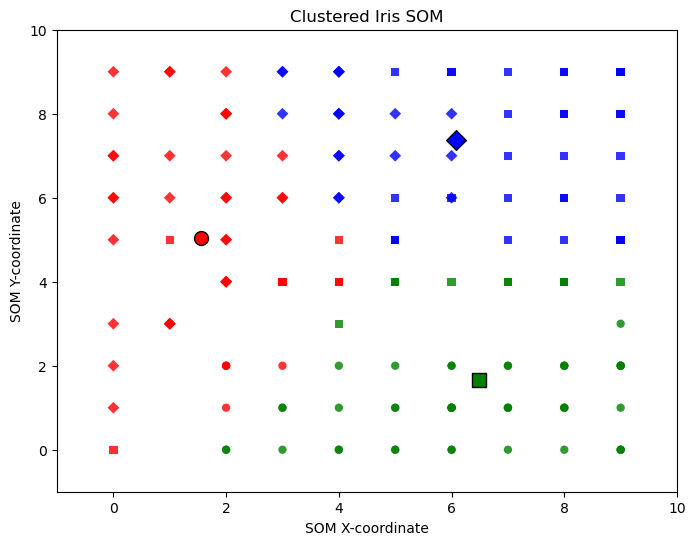

In [14]:
# Create a scatter plot of the clustered Iris SOM
plt.figure(figsize=(8, 6))

# Define the colors and markers for each cluster
colors = ['red', 'green', 'blue']
markers = ['o', 's', 'D']

# Plot the samples
for i in range(X.shape[0]):
    plt.scatter(y_pred[i, 0], y_pred[i, 1], c=colors[kmeans.labels_[i]],
                marker=markers[int(y[i])], edgecolors='none', alpha=0.8)

# Plot the cluster centers
for i, center in enumerate(kmeans.cluster_centers_):
    plt.scatter(center[0], center[1], c=colors[i], marker=markers[i], s=100, edgecolors='k')

# Set the x and y limits
plt.xlim([np.min(y_pred[:, 0])-1, np.max(y_pred[:, 0])+1])
plt.ylim([np.min(y_pred[:, 1])-1, np.max(y_pred[:, 1])+1])

# Set the axis labels and title
plt.xlabel('SOM X-coordinate')
plt.ylabel('SOM Y-coordinate')
plt.title('Clustered Iris SOM')

plt.show()


```python
This code creates a scatter plot of the clustered Iris SOM.

First, a figure of size 8x6 is created using the plt.figure() function. Then, the colors and markers for each cluster are defined as lists of strings.

The samples are plotted using a loop over the samples in the Iris dataset. For each sample, the x and y coordinates of the corresponding neuron in the SOM are obtained from the y_pred array, which was created by the predict() method of the SOM object. The color of the marker is set based on the label assigned to that sample by the KMeans clustering algorithm, and the shape of the marker is set based on the true label of the sample. The transparency of the markers is set to 0.8 using the alpha parameter.

The cluster centers are plotted using a loop over the cluster centers computed by the KMeans algorithm. For each cluster center, the x and y coordinates of the corresponding neuron in the SOM are obtained from the cluster_centers_ attribute of the KMeans object. The color and shape of the marker are set based on the index of the cluster center in the list of colors and markers.

The x and y limits of the plot are set based on the minimum and maximum x and y coordinates in the y_pred array using the np.min() and np.max() functions.

Finally, the x and y axis labels and the title of the plot are set using the plt.xlabel(), plt.ylabel(), and plt.title() functions, respectively. The plot is displayed using the plt.show() function.
```